In [8]:
import gym
import numpy as np
from plot_utils import plot_V

In [9]:
# Initialize the gym environment
env = gym.make('FrozenLake-v0')

In [10]:
print('Number of states:  ', env.nS)
print('Number of actions: ', env.nA)
print('Example MPD for a state and action (prob, next_state, reward, done) ')
print(env.P[1][0])

Number of states:   16
Number of actions:  4
Example MPD for a state and action (prob, next_state, reward, done) 
[(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)]


In [11]:
def extract_policy(env, V, gamma=1):
	# initialize the policy with zeros
	policy = np.zeros(env.nS) 
	
	for state in range(env.nS):
		# initialize the Q table for a state
		Q_table = np.zeros(env.nA)
		
		# compute Q value for all ations in the state
		for action in range(env.nA):
			for next_sr in env.P[state][action]: 
				trans_prob, next_state, reward_prob, _ = next_sr 
				Q_table[action] += (trans_prob * (reward + gamma * V[next_state]))
		
		# select the action which has maximum Q value as an optimal action of the state
		policy[state] = np.argmax(Q_table)
	
	return policy

# Iterative Policy Evaluation
---

- Find V(s) for a given policy
- Assumes agent has full knowledge of MPD   
- Motivated by the Bellman Expectation Equation for the State-Value Function   
- Uses an iterative approach
- Guarenteed to converge in infinte time but can stop when updates small
- Finding the optimal policy is a control problem

![Iterative Policy Evaluation](images/iterative_policy_evaluation.png)   
source Udacity   

In [12]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    
    while True:
        delta = 0
        for state in range(env.nS):
            Vs = 0
            for action, action_prob in enumerate(policy[state]):
                for trans_prob, next_state, reward, done in env.P[state][action]:
                    Vs += action_prob * trans_prob * (reward + gamma * V[next_state])
            delta = max(delta, np.fabs(V[state]-Vs))
            V[state] = Vs
                
        if delta < theta:
            break
    
    return V

In [13]:
# test with a random policy
policy = np.ones([env.nS, env.nA]) / env.nA 
print(policy)

[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


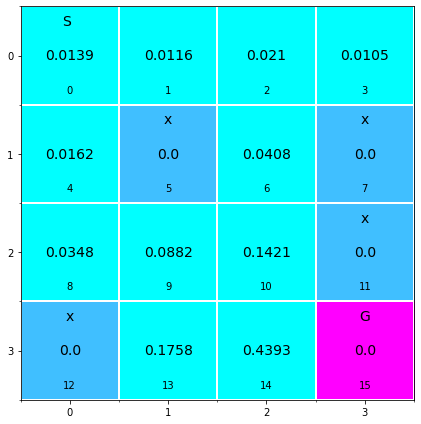

In [14]:
V = policy_evaluation(env, policy)
plot_V(env, V)